# **Importación de los datos desde repositorio Github**

In [ ]:
import cv2
import os
import subprocess
import shutil

# Clonar el repositorio de GitHub
repo_url = 'https://github.com/skyteck8/Cromatography-Dataset.git'

subprocess.run(['git', 'clone', repo_url])


CompletedProcess(args=['git', 'clone', 'https://github.com/skyteck8/Cromatography-Dataset.git'], returncode=0)

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.applications import VGG19

In [ ]:
from keras.applications import VGG16

In [ ]:
IMAGE_SIZE = (224, 224)

**The load_train_data function is designed to prepare training data for a classification task from a given folder path. It first initializes empty lists to store images (X) and their corresponding labels (y). It then extracts the class names by listing directories within the provided folder path. For each class, it iterates through the images, loads them using load_img, resizes them to a specified target size, converts them to arrays using img_to_array, and appends both the image arrays and their corresponding class labels to the X and y lists, respectively. Finally, it converts these lists into NumPy arrays and returns them. Overall, the function efficiently organizes and preprocesses the training data, making it ready for training a classification model.**

In [ ]:
def load_train_data(folder_path):
    X = []
    y = []
    class_names = os.listdir(folder_path)
    print(class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

**The load_test_data function is responsible for loading and preprocessing test data for a classification task from a specified folder path.**

In [ ]:
def load_test_data(folder_path):
    X = []
    filenames = []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X)
    return X, filenames

In [ ]:
train_folder = '/content/Cromatography-Dataset/train'
# test_folder = '/content/FlowerDataset/test'
X_train, y_train = load_train_data(train_folder)
# X_test, test_filenames = load_test_data(test_folder)

['1', '0']


**Converting the data type of the arrays X_train and X_test to float32 and then scales the pixel values to the range [0, 1] by dividing each pixel value by 255.0. This normalization process improves the convergence of the neural network during training by ensuring that the input data is within a consistent range**

In [ ]:
X_train = X_train.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0

**Split training data into train and validation sets**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# NUM_CLASSES = 5
# model = Sequential()
# model.add(vgg16_base)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:

# NUM_CLASSES = 5
# # Definir el tamaño de entrada esperado por VGG16
# input_tensor = Input(shape=(224, 224, 3))

# # Crear la base de VGG16 con los pesos preentrenados, sin incluir las capas superiores
# vgg16_base = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# # Crear el modelo secuencial
# model = Sequential()
# model.add(vgg16_base)  # Añade la base VGG16
# model.add(Flatten())   # Aplanar los resultados de las capas convolucionales
# model.add(Dense(256, activation='relu'))  # Añadir una capa densa
# model.add(Dense(NUM_CLASSES, activation='softmax'))  # Capa de salida softmax para clasificación

# Asegúrate de que el modelo se compila
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**Ensuring that the pre-trained weights of the VGG16 model are not modified during training.**

In [ ]:
vgg16_base.trainable = False

In [ ]:
# input_tensor = Input(shape=(224, 224, 3))

# # Crear la base de VGG16 con los pesos preentrenados, sin incluir las capas superiores
# vgg16_base = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# # Crear el modelo secuencial
# model = Sequential()
# model.add(vgg16_base)  # Añade la base VGG16
# model.add(Flatten())   # Aplanar los resultados de las capas convolucionales
# model.add(Dense(256, activation='relu'))  # Añadir una capa densa
# model.add(Dense(1, activation='sigmoid'))  # Cambio para clasificación binaria
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
BATCH_SIZE = 128
EPOCHS = 5
NUM_CLASSES = 5

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1/1 [==============================] - 0s 288ms/step - loss: 0.2034 - accuracy: 0.9231 - val_loss: 0.2678 - val_accuracy: 0.9500
Epoch 2/10
1/1 [==============================] - 0s 163ms/step - loss: 0.2011 - accuracy: 0.8718 - val_loss: 0.3133 - val_accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 0s 151ms/step - loss: 0.1979 - accuracy: 0.9231 - val_loss: 0.2885 - val_accuracy: 0.8500
Epoch 4/10
1/1 [==============================] - 0s 153ms/step - loss: 0.1448 - accuracy: 0.9487 - val_loss: 0.3094 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 0s 147ms/step - loss: 0.1525 - accuracy: 0.9615 - val_loss: 0.3475 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 0s 155ms/step - loss: 0.1263 - accuracy: 0.9615 - val_loss: 0.3650 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 148ms/step - loss: 0.1109 - accuracy: 0.9487 - val_loss: 0.3474 - val_accuracy: 0.8500
Epoch 8/10
1/1 [====

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,986,897 (129.65 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,848,140 (49.01 MB)

In [ ]:
model.evaluate(X_val,y_val)

1/1 [==============================] - 0s 43ms/step - loss: 0.4184 - accuracy: 0.8500


[0.4183819890022278, 0.8500000238418579]

In [ ]:
X_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 0.99215686, 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9764706 , 0.9764706 , 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
def preprocess_image(image):
    # Convertimos la imagen a un tensor si no lo es
    if not isinstance(image, tf.Tensor):
        image = tf.convert_to_tensor(image, dtype=tf.float32)

    # Redimensionamos la imagen al tamaño esperado por el modelo (224x224)
    image = tf.image.resize(image, (224, 224))

    # Normalizamos los valores de los píxeles a [0, 1]
    image = image / 255.0

    # Añadimos una dimensión para que sea compatible con el modelo (batch size)
    image = tf.expand_dims(image, axis=0)

    return image

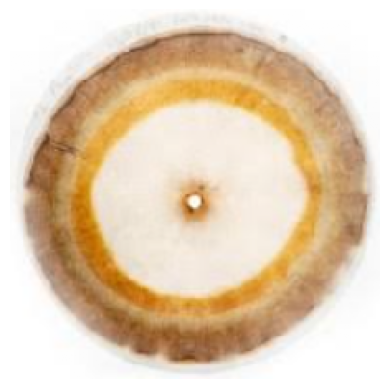

In [ ]:
import matplotlib.pyplot as plt

def display_image(image):
    # Si la imagen es un tensor, la convertimos a un numpy array
    if isinstance(image, tf.Tensor):
        image = image.numpy()

    # Si la imagen tiene una dimensión extra (batch size), la removemos
    if image.shape[0] == 1:
        image = image[0]

    # Mostramos la imagen
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Ejemplo de uso
# Supongamos que X_train[0] es una imagen en formato numpy array
# X_train[0] = ... (tu imagen aquí)
display_image(X_train[71])

In [ ]:
print(X_train[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         0.99215686 1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.9764706  0.9764706  0.99215686]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


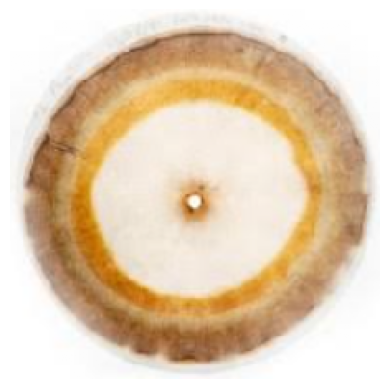

1/1 [==============================] - 0s 19ms/step
[[0.5380315]]


In [ ]:
id=71
display_image(X_train[71])
print(model.predict(preprocess_image(X_train[71])))

In [ ]:
len(X_train)

78

In [ ]:
for i in range(len(X_train)):
  display_image(X_train[i])
  print(model.predict(preprocess_image(X_train[i])))